In [1]:
!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip gtzan-dataset-music-genre-classification

Dataset URL: https://www.kaggle.com/datasets/andradaolteanu/gtzan-dataset-music-genre-classification
License(s): other
100% 1.21G/1.21G [01:06<00:00, 20.4MB/s]
100% 1.21G/1.21G [01:06<00:00, 19.7MB/s]
Archive:  gtzan-dataset-music-genre-classification.zip
  inflating: Data/features_30_sec.csv  
  inflating: Data/features_3_sec.csv  
  inflating: Data/genres_original/blues/blues.00000.wav  
  inflating: Data/genres_original/blues/blues.00001.wav  
  inflating: Data/genres_original/blues/blues.00002.wav  
  inflating: Data/genres_original/blues/blues.00003.wav  
  inflating: Data/genres_original/blues/blues.00004.wav  
  inflating: Data/genres_original/blues/blues.00005.wav  
  inflating: Data/genres_original/blues/blues.00006.wav  
  inflating: Data/genres_original/blues/blues.00007.wav  
  inflating: Data/genres_original/blues/blues.00008.wav  
  inflating: Data/genres_original/blues/blues.00009.wav  
  inflating: Data/genres_original/blues/blues.00010.wav  
  inflating: Data/genres_or

In [2]:
import os
import librosa
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
audio_file = "/content/Data/genres_original/blues/blues.00000.wav"


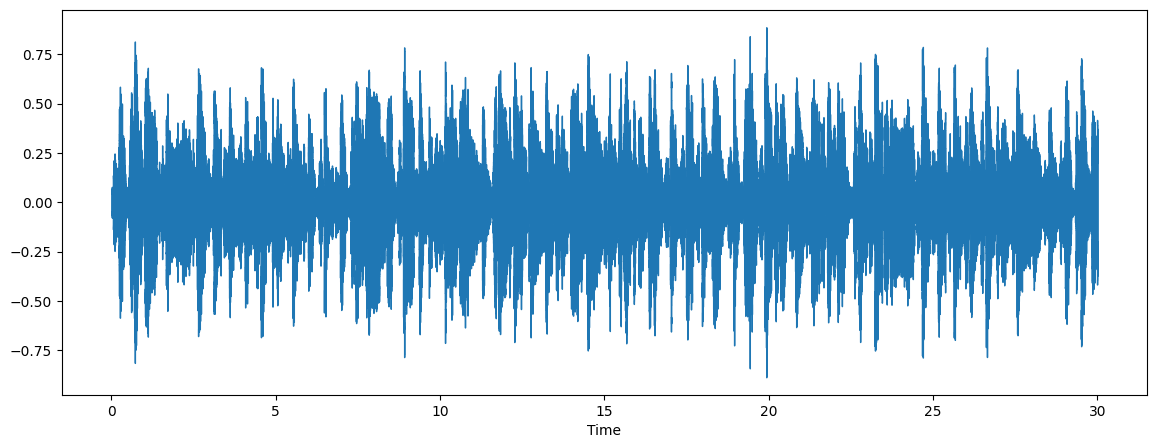

In [4]:
x, sr = librosa.load(audio_file, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
# agar hum directly ye graph model ko de denge to wo itne complex features capture nhi kr pae ga . thats why
# we will break this into chunks some seconds
# other things that for one audio file there will be only one training example and in this way we can not achieve
# good accuracy so we sample graph into many chunks and in this way our training size will also increase

In [5]:
from IPython.display import Audio
Audio(data=x, rate=sr)

In [6]:
# we need to convert this into spectrogram chunks
def plot_melspectrogram_chunks(y,sr):
    chunk_duration = 4
    overlap_duration = 2
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    for i in range(num_chunks):
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        chunk = y[start:end]
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 345)


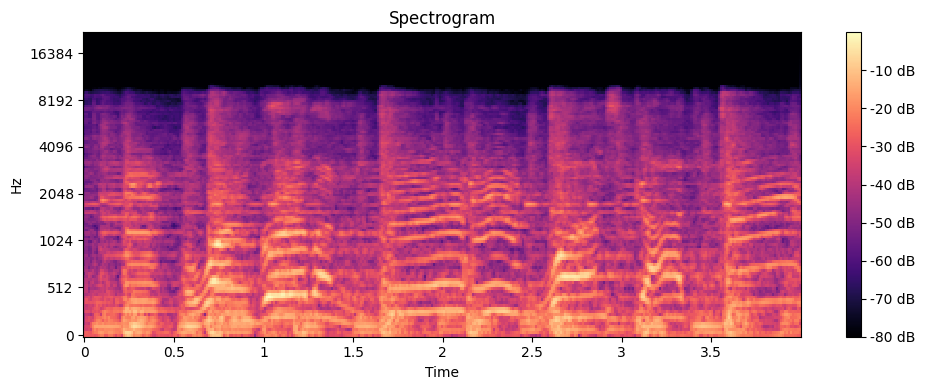

(128, 345)


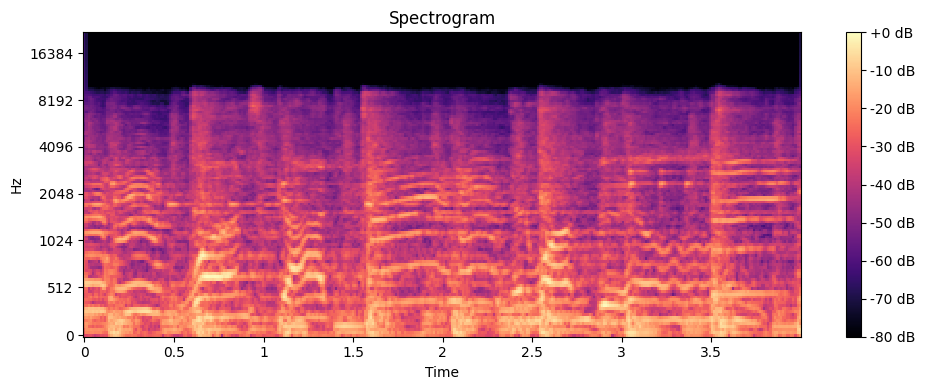

(128, 345)


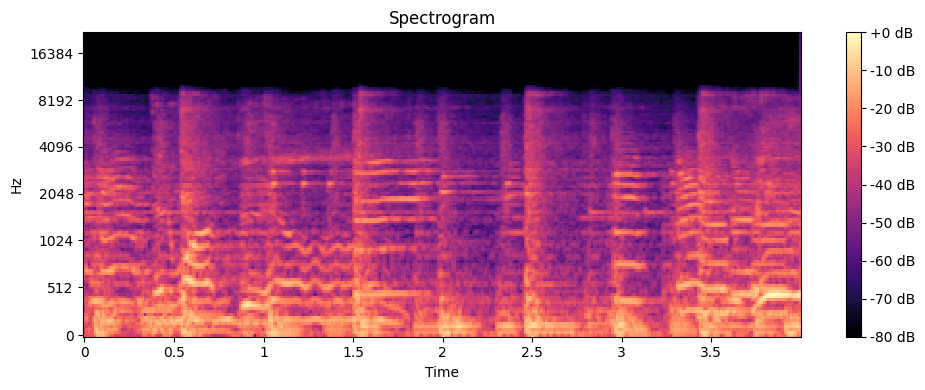

(128, 345)


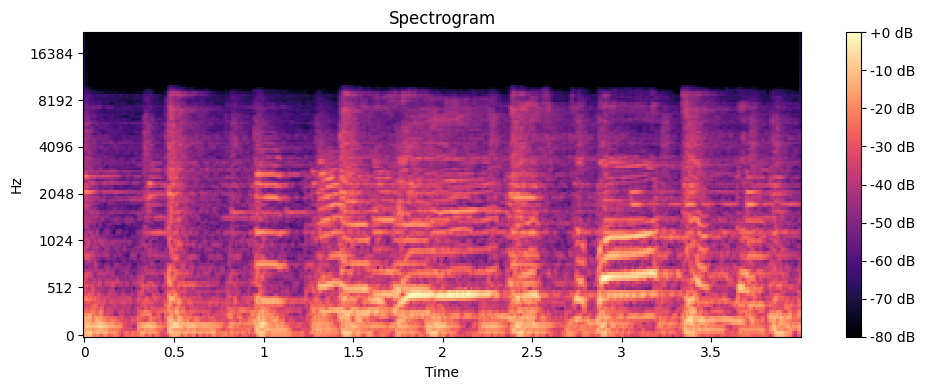

(128, 345)


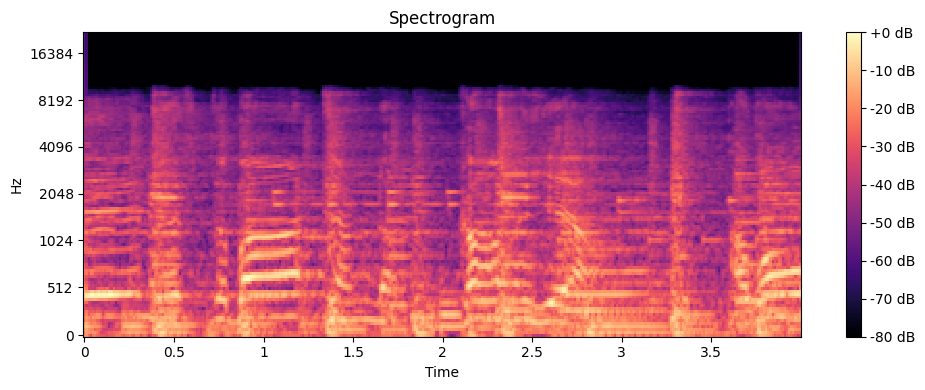

(128, 345)


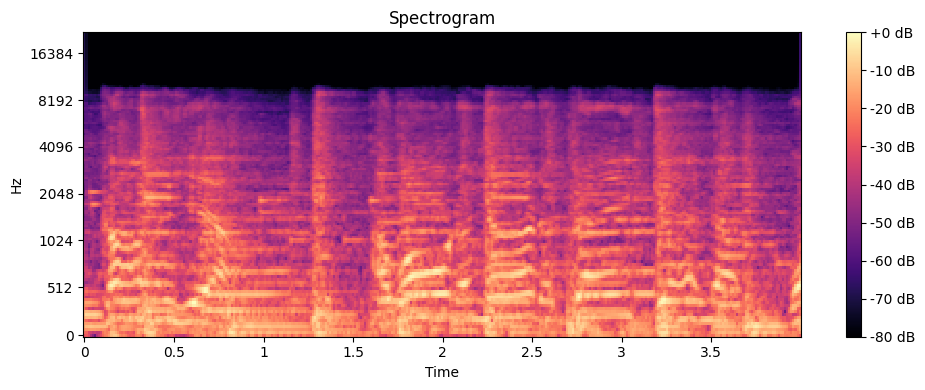

(128, 345)


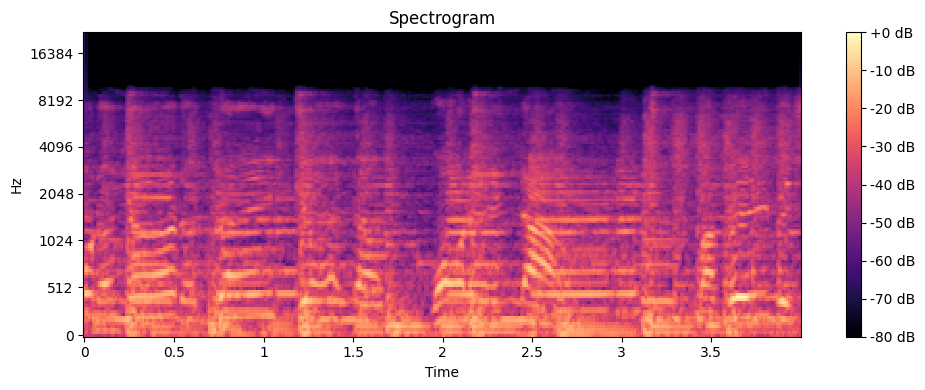

(128, 345)


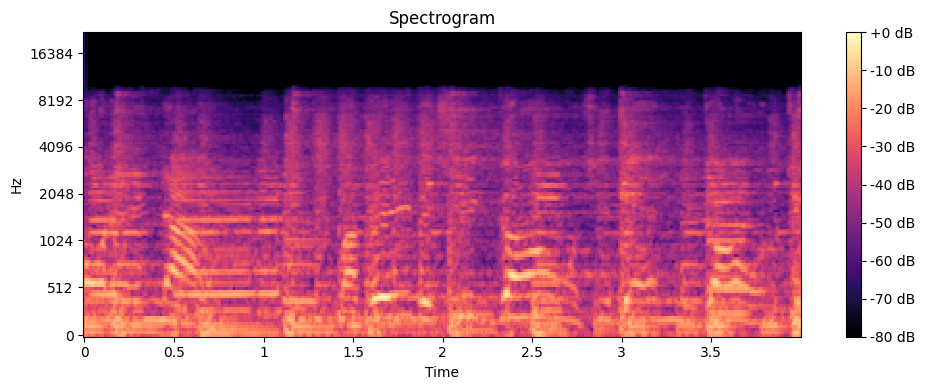

(128, 345)


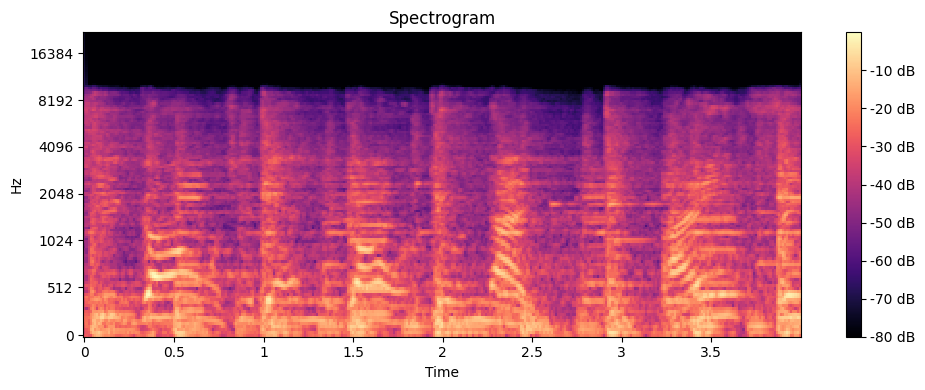

(128, 345)


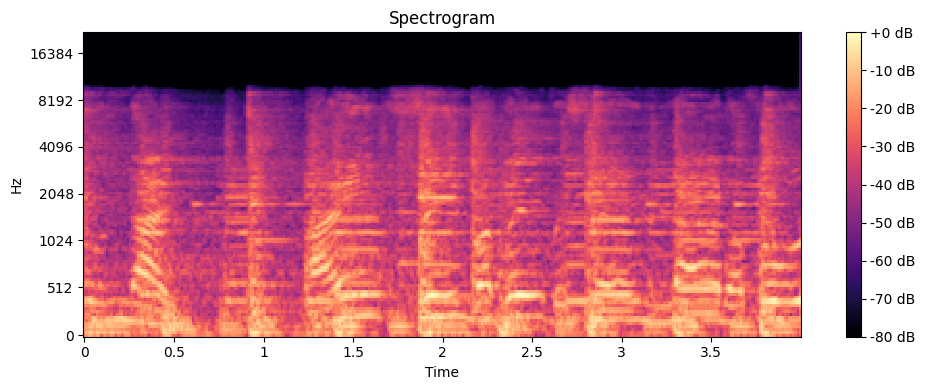

(128, 345)


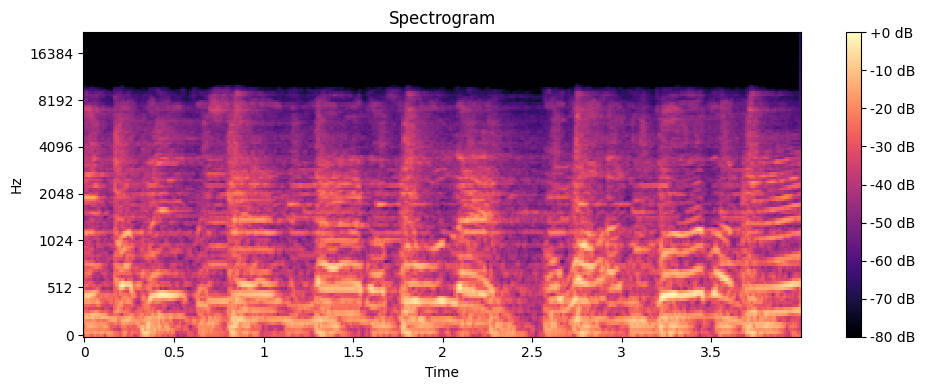

(128, 345)


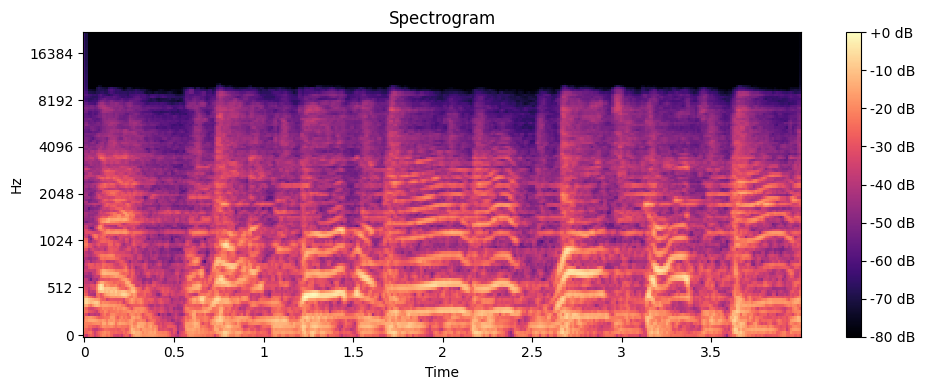

(128, 345)


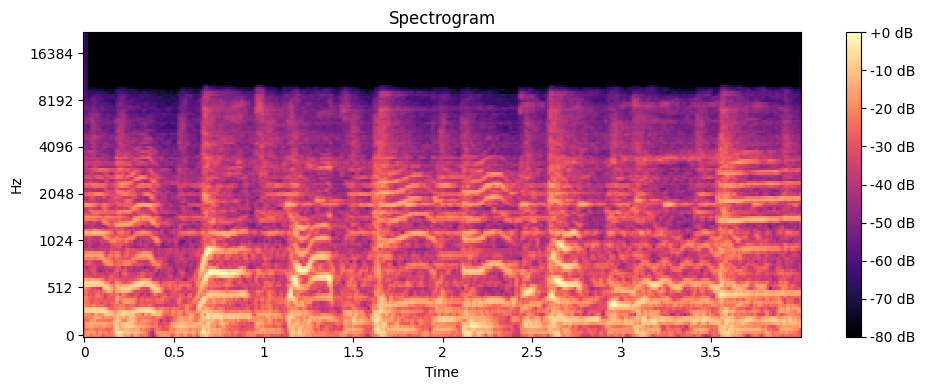

(128, 345)


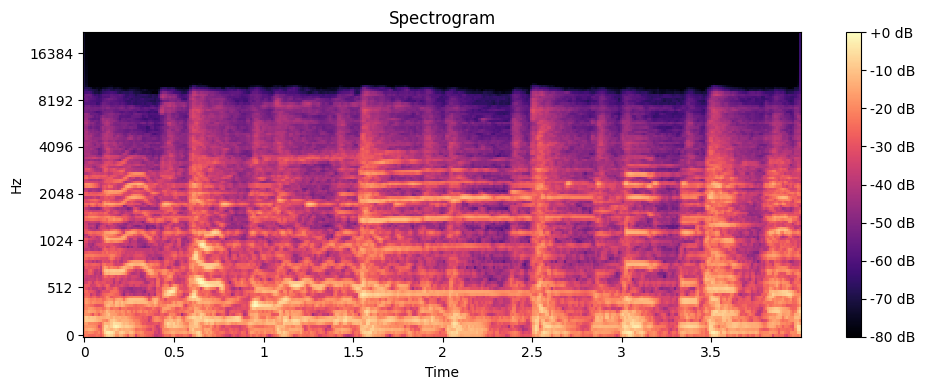

(128, 174)


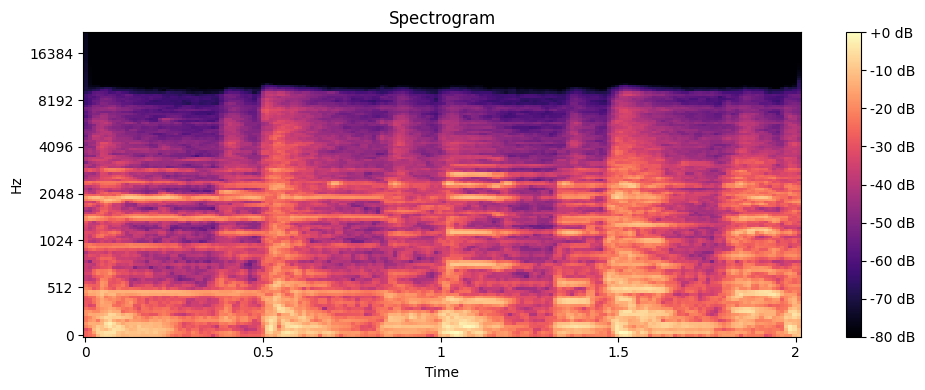

In [7]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)


In [8]:
data_dir = '/content/Data/genres_original'
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [9]:
from tensorflow.image import resize
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='librosa')

def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing--", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                    chunk_duration = 4
                    overlap_duration = 2

                    chunk_samples = chunk_duration * sample_rate
                    overlap_samples = overlap_duration * sample_rate

                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                    for i in range(num_chunks):
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples
                        chunk = audio_data[start:end]

                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                        data.append(mel_spectrogram)
                        labels.append(i_class)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

    return np.array(data), np.array(labels)

x, y = load_and_preprocess_data(data_dir, classes)

# Convert labels to categorical
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, num_classes=len(classes))

# Check shapes of data and labels
print(x.shape)
print(Y.shape)




Processing-- blues
Processing-- classical
Processing-- country
Processing-- disco
Processing-- hiphop
Processing-- jazz


<ipython-input-9-efd54582fcca>:16: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing /content/Data/genres_original/jazz/jazz.00054.wav: 
Processing-- metal
Processing-- pop
Processing-- reggae
Processing-- rock
(14975, 150, 150, 1)
(14975, 10)


In [10]:
x


array([[[[1.02983691e-01],
         [9.96461034e-01],
         [2.21956062e+00],
         ...,
         [2.30218458e+00],
         [1.97426367e+00],
         [1.78085589e+00]],

        [[4.20742035e-01],
         [1.76180530e+00],
         [2.65676045e+00],
         ...,
         [1.49333918e+00],
         [1.80527401e+00],
         [1.07236719e+00]],

        [[4.04230803e-01],
         [1.26786268e+00],
         [2.06060195e+00],
         ...,
         [8.79672110e-01],
         [1.01816940e+00],
         [4.81783181e-01]],

        ...,

        [[2.08980759e-06],
         [4.53210959e-07],
         [3.58074566e-08],
         ...,
         [4.30942002e-08],
         [1.19983788e-05],
         [1.49344181e-04]],

        [[1.91026515e-06],
         [3.93092222e-07],
         [1.13161791e-08],
         ...,
         [7.46367679e-09],
         [1.18505732e-05],
         [1.47836588e-04]],

        [[1.82698670e-06],
         [3.73337741e-07],
         [5.44610135e-09],
         ...,
 

In [11]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [12]:
from tensorflow.keras.utils import to_categorical
Y = to_categorical(y, num_classes=len(classes))
Y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [13]:
print(x.shape)
print(Y.shape)

(14975, 150, 150, 1)
(14975, 10)


In [14]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import LSTM, TimeDistributed, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [15]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%), validation (15%), and testing (15%) sets
x_train, x_temp, y_train, y_temp = train_test_split(x, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(10482, 150, 150, 1) (10482, 10)
(2246, 150, 150, 1) (2246, 10)
(2247, 150, 150, 1) (2247, 10)


In [16]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Define learning rate schedule
def lr_schedule(epoch, lr):
    return lr * 0.1 if epoch % 10 == 0 and epoch != 0 else lr

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

def create_simple_model(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [18]:
input_shape = (150, 150, 1)
num_classes = Y.shape[1]
model = create_simple_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,637,066 (40.58 MB)

 Trainable params: 10,637,066 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model_best.keras', save_best_only=True)

# Train the model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


328/328 ━━━━━━━━━━━━━━━━━━━━ 36s 87ms/step - accuracy: 0.1930 - loss: 6.7398 - val_accuracy: 0.3687 - val_loss: 1.7906
Epoch 2/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 23s 70ms/step - accuracy: 0.3262 - loss: 1.8503 - val_accuracy: 0.4332 - val_loss: 1.5541
Epoch 3/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step - accuracy: 0.3957 - loss: 1.6814 - val_accuracy: 0.4982 - val_loss: 1.4594
Epoch 4/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 23s 67ms/step - accuracy: 0.4349 - loss: 1.5799 - val_accuracy: 0.5490 - val_loss: 1.3024
Epoch 5/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.4673 - loss: 1.4810 - val_accuracy: 0.5120 - val_loss: 1.3653
Epoch 6/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 27s 81ms/step - accuracy: 0.4926 - loss: 1.4050 - val_accuracy: 0.5744 - val_loss: 1.2143
Epoch 7/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 38s 74ms/step - accuracy: 0.5103 - loss: 1.3836 - val_accuracy: 0.5619 - val_loss: 1.2414
Epoch 8/30
328/328 ━━━━━━━━━━━━━━━━━━━━ 46s 88ms/step - accuracy: 0.5308 - loss: 1.3348 - val_accurac

In [20]:
# Save the final model in the recommended Keras format
model.save('Music_Genre_Classification_Final_Model.keras')

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6609 - loss: 0.9385
Test Accuracy: 0.6716


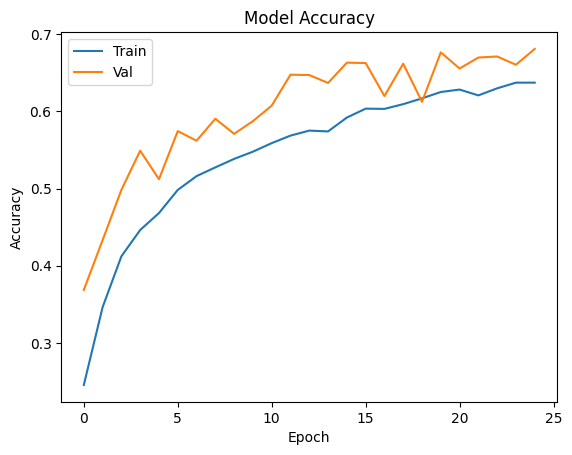

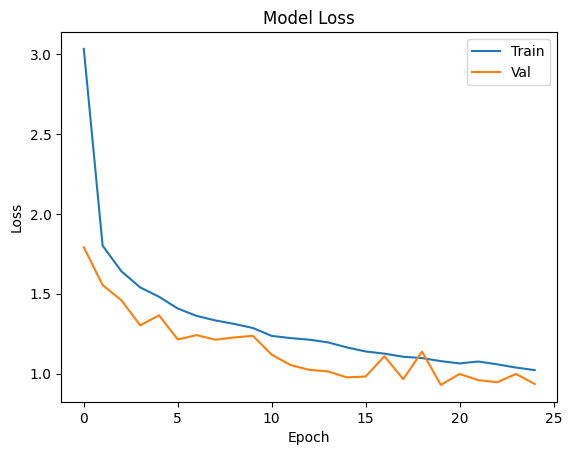

In [21]:
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")


# Plot the training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'])
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])
plt.show()

In [22]:
from tensorflow.keras.models import load_model
import numpy as np

# Load the saved model
model = load_model('Music_Genre_Classification_Final_Model.keras')

# Example: Assuming you have some test data stored in `x_test`
# Replace `new_data` with your actual data to make predictions
# For demonstration, let's create dummy data with the same shape as the input
new_data = np.random.rand(1, 150, 150, 1)  # Replace with your actual data

# Use the model to make predictions
predictions = model.predict(new_data)

# Output the predictions
print(predictions)

# Optionally, find the predicted class
predicted_class = np.argmax(predictions)
print(f'Predicted class: {predicted_class}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step
[[3.5853907e-06 1.8185314e-05 2.4111425e-06 2.9978697e-04 1.6433435e-02
  7.0384871e-05 9.2288029e-01 1.9971738e-03 9.2800210e-06 5.8285430e-02]]
Predicted class: 6


In [23]:
!pip install ipywidgets
!pip install librosa


  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [25]:
import numpy as np
import librosa
import librosa.display
import tensorflow as tf
from tensorflow.keras.models import load_model
from ipywidgets import widgets
from IPython.display import display, Audio
import matplotlib.pyplot as plt

# Define the preprocess function for the uploaded audio file
def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, sr=44100)

    # Convert audio to chunks and spectrogram
    def extract_chunks(y, sr):
        chunk_duration = 4
        overlap_duration = 2
        chunk_samples = chunk_duration * sr
        overlap_samples = overlap_duration * sr
        num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
        chunks = []
        for i in range(num_chunks):
            start = i * (chunk_samples - overlap_samples)
            end = start + chunk_samples
            chunk = y[start:end]
            mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
            mel_spectrogram = tf.image.resize(np.expand_dims(mel_spectrogram, axis=-1), (150, 150))
            chunks.append(mel_spectrogram)
        return np.array(chunks)

    chunks = extract_chunks(y, sr)
    return chunks

# Load the saved model
model = load_model('Music_Genre_Classification_Final_Model.keras')

# Define the prediction function
def predict_genre(file_path):
    # Preprocess the audio
    data = preprocess_audio(file_path)

    # Predict the genre
    predictions = model.predict(data)

    # Aggregate predictions (for demonstration, we take the mean of predictions)
    mean_prediction = np.mean(predictions, axis=0)
    predicted_class = np.argmax(mean_prediction)

    return predicted_class, mean_prediction

# Create file upload widget
upload_widget = widgets.FileUpload(accept='.wav', multiple=False)

# Create a button widget
predict_button = widgets.Button(description="Predict Genre")

# Create output widget
output = widgets.Output()

def on_predict_button_clicked(b):
    with output:
        # Clear previous output
        output.clear_output()

        # Get the uploaded file
        if upload_widget.value:
            file_info = list(upload_widget.value.values())[0]
            file_path = "/content/temp_audio.wav"
            with open(file_path, 'wb') as f:
                f.write(file_info['content'])

            # Make prediction
            predicted_class, prediction_probs = predict_genre(file_path)

            # Display results
            print(f"Predicted Genre Class: {predicted_class}")
            print(f"Prediction Probabilities: {prediction_probs}")

            # Optionally, display the audio file
            display(Audio(file_path))
        else:
            print("No file uploaded.")

# Attach the button click event to the function
predict_button.on_click(on_predict_button_clicked)

# Display widgets
display(upload_widget, predict_button, output)

No file uploaded.
